# Import software libraries and load the dataset

In [1]:
# The dataset is saved in my google drive. For more information about the dataset use
# the following URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt 
import tensorflow as tf                # Train neural networks for deep learning.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- TensorFlow {}'.format(tf.__version__))

# Uncomment the following two lines to make outcomes deterministic. Supply whatever seed values you wish.
np.random.seed(1337)
tf.random.set_seed(1)

Libraries used in this project:
- Python 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
- NumPy 1.22.4
- Matplotlib 3.5.3
- TensorFlow 2.11.0


In [3]:
# Load the dataset.

from zipfile import ZipFile
file_name = '/content/drive/MyDrive/Qatari-Dataset-Images-[3016Train-600Test].zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
# PRINT OUT THE DETAILS OF AN IMAGE (FILE FORMAT, COLOR MODE, SIZE)

# load and show an image with Pillow
from PIL import Image

# load the image
image = Image.open('/content/Qatari-Dataset-Images-[3016Train-600Test]/testing/test_covid/COVID-1.png')

# summarize some details about the image
print('File format:', image.format)
print('Color mode: ', image.mode)
print('Image size: ', image.size)

File format: PNG
Color mode:  L
Image size:  (299, 299)


# Split the dataset

In [5]:
batch_size = 16
image_height = 299
image_width = 299

In [6]:
training_data = tf.keras.preprocessing.image_dataset_from_directory('Qatari-Dataset-Images-[3016Train-600Test]/training',
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    #class_names=[0,1],
                                                                    color_mode='grayscale',
                                                                    batch_size=batch_size,
                                                                    image_size=(image_height, image_width),
                                                                    shuffle=True,
                                                                    seed=123,
                                                                    validation_split=0.1,
                                                                    subset='training')

print('----------------------------------')

validation_data = tf.keras.preprocessing.image_dataset_from_directory('Qatari-Dataset-Images-[3016Train-600Test]/training',
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    #class_names=[0,1],
                                                                    color_mode='grayscale',
                                                                    batch_size=batch_size,
                                                                    image_size=(image_height, image_width),
                                                                    shuffle=True,
                                                                    seed=123,
                                                                    validation_split=0.1,
                                                                    subset='validation')

print('----------------------------------')

testing_data = tf.keras.preprocessing.image_dataset_from_directory('Qatari-Dataset-Images-[3016Train-600Test]/testing',
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    #class_names=[0,1],
                                                                    color_mode='grayscale',
                                                                    batch_size=batch_size,
                                                                    image_size=(image_height, image_width),
                                                                    shuffle=True,
                                                                    seed=123,
                                                                    #validation_split=0.1,
                                                                    )

Found 6032 files belonging to 2 classes.
Using 5429 files for training.
----------------------------------
Found 6032 files belonging to 2 classes.
Using 603 files for validation.
----------------------------------
Found 1200 files belonging to 2 classes.


# Visualize the data examples

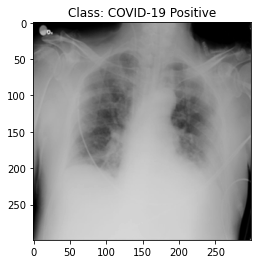

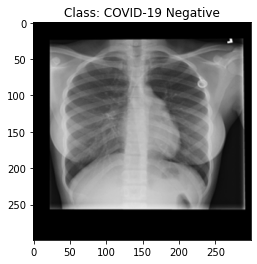

In [7]:
# Plot 1 image each for postive and negative cases.

pos_image = Image.open('/content/Qatari-Dataset-Images-[3016Train-600Test]/testing/test_covid/COVID-1.png')
neg_image = Image.open('/content/Qatari-Dataset-Images-[3016Train-600Test]/testing/test_normal/Normal-1.png')

plt.imshow(pos_image, cmap = 'gray')
plt.title('Class: COVID-19 Positive');
plt.show()
plt.imshow(neg_image, cmap = 'gray')
plt.title('Class: COVID-19 Negative');

# Prepare the data for training

In [8]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  
  return images, labels

#print(training_data.get_single_element(), end='\n\n')

# The map function applies the normalize function to each element in the train
# and test datasets
training_data = training_data.map(normalize)
validation_data = validation_data.map(normalize)
testing_data = testing_data.map(normalize)

#print(training_data.get_single_element())

# Data Augmentation

In [9]:
''' from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               #fill_mode='nearest'
                               validation_split=0.1)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory='Qatari-Dataset-Images-[3016Train-600Test]/training',
                                               shuffle=True,
                                               target_size=(image_height,image_width),
                                               color_mode='grayscale',
                                               class_mode='binary',
                                               seed=123,
                                               subset='training')

validation_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory='Qatari-Dataset-Images-[3016Train-600Test]/training',
                                               shuffle=True,
                                               target_size=(image_height,image_width),
                                               color_mode='grayscale',
                                               class_mode='binary',
                                               seed=123,
                                               subset='validation') '''

" from tensorflow.keras.preprocessing.image import ImageDataGenerator\n\nimage_gen = ImageDataGenerator(rescale=1./255,\n                               horizontal_flip=True,\n                               rotation_range=40,\n                               width_shift_range=0.2,\n                               height_shift_range=0.2,\n                               shear_range=0.2,\n                               zoom_range=0.2,\n                               #fill_mode='nearest'\n                               validation_split=0.1)\n\ntrain_data_gen = image_gen.flow_from_directory(batch_size=batch_size,\n                                               directory='Qatari-Dataset-Images-[3016Train-600Test]/training',\n                                               shuffle=True,\n                                               target_size=(image_height,image_width),\n                                               color_mode='grayscale',\n                                               class

# Build the CNN structure

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.30),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.50),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.50),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.50),

    tf.keras.layers.Dense(2)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

# Compile the model and examine the layers

In [12]:
model.compile(#optimizer='adam',
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00002),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

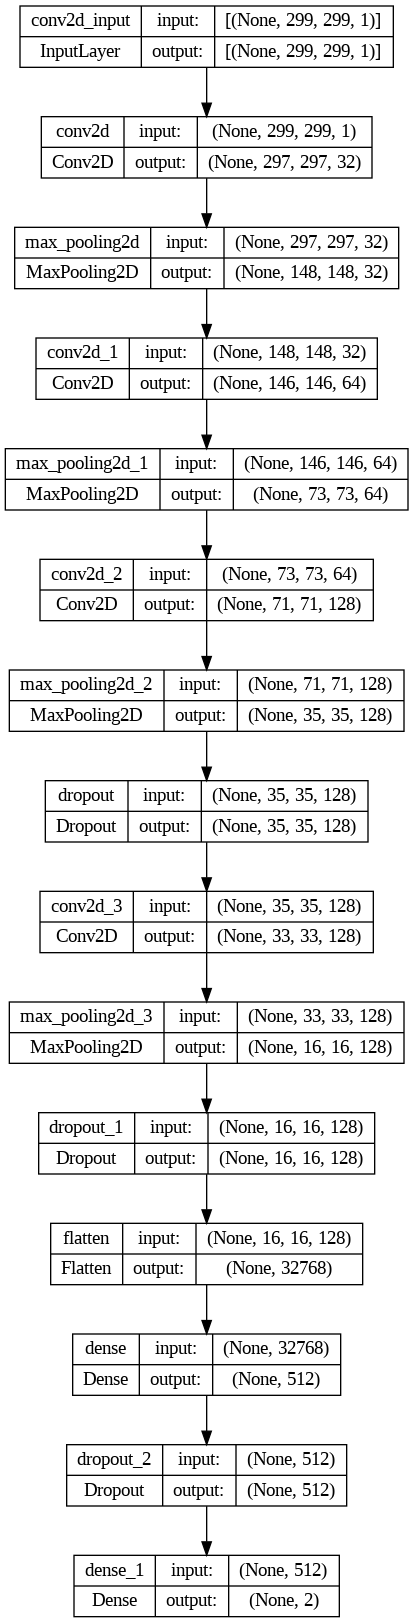

In [13]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'model.png')

# Train the model

In [14]:
epochs = 50 #100 # Observerd that improvement caps at around 32 epochs. (to save time)

history = model.fit(training_data, validation_data=validation_data, epochs=epochs)

''' history = model.fit_generator(train_data_gen,
                              validation_data=validation_data_gen, 
                              epochs=epochs) '''

Epoch 1/50
340/340 [==============================] - 41s 90ms/step - loss: 0.6389 - accuracy: 0.6283 - val_loss: 0.6082 - val_accuracy: 0.7463
Epoch 2/50
340/340 [==============================] - 31s 90ms/step - loss: 0.5467 - accuracy: 0.7178 - val_loss: 0.5402 - val_accuracy: 0.7479
Epoch 3/50
340/340 [==============================] - 31s 90ms/step - loss: 0.4508 - accuracy: 0.7801 - val_loss: 0.4190 - val_accuracy: 0.8209
Epoch 4/50
340/340 [==============================] - 32s 94ms/step - loss: 0.3802 - accuracy: 0.8246 - val_loss: 0.3857 - val_accuracy: 0.8425
Epoch 5/50
340/340 [==============================] - 31s 90ms/step - loss: 0.3546 - accuracy: 0.8403 - val_loss: 0.3554 - val_accuracy: 0.8690
Epoch 6/50
340/340 [==============================] - 30s 89ms/step - loss: 0.3306 - accuracy: 0.8530 - val_loss: 0.3522 - val_accuracy: 0.8607
Epoch 7/50
340/340 [==============================] - 31s 91ms/step - loss: 0.3124 - accuracy: 0.8689 - val_loss: 0.3299 - val_accuracy:

' history = model.fit_generator(train_data_gen,\n                              validation_data=validation_data_gen, \n                              epochs=epochs) '

# Evaluate the model on the test data

In [15]:
loss_accuracy, test_accuracy = model.evaluate(testing_data)
print('Accuracy on test dataset:', test_accuracy)

75/75 [==============================] - 3s 37ms/step - loss: 0.1450 - accuracy: 0.9558
Accuracy on test dataset: 0.9558333158493042


# Make predictions on the test data

In [16]:
predictions = model.predict(testing_data)
print(np.argmax(predictions, axis=1)[:10])

75/75 [==============================] - 3s 28ms/step
[0 1 0 1 0 1 0 1 1 0]


In [17]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1./255)
generator = image_gen.flow_from_directory(batch_size=30,
                                          directory='Qatari-Dataset-Images-[3016Train-600Test]/testing', 
                                          shuffle=True,
                                          color_mode='grayscale',
                                          target_size=(299,299),
                                          seed=123
                                          )

Found 1200 images belonging to 2 classes.


In [18]:
# Prediction vs actual, for 16 (batch size) sampled images.

X,y = generator.next()
prediction = model.predict(X)
print('Predicted: ', np.argmax(prediction, axis=1))
print('Actual:    ', np.argmax(y, axis=1))
print()

''' for step in generator:
  X, y = step
  prediction = model.predict(X)
  print('Predicted: ', np.argmax(prediction, axis=1))
  print('Actual:    ', np.argmax(y, axis=1))
  print() '''

1/1 [==============================] - 1s 657ms/step
Predicted:  [0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1]
Actual:     [0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1]



" for step in generator:\n  X, y = step\n  prediction = model.predict(X)\n  print('Predicted: ', np.argmax(prediction, axis=1))\n  print('Actual:    ', np.argmax(y, axis=1))\n  print() "

# Visualize the model's **accuracy** and **loss** during training

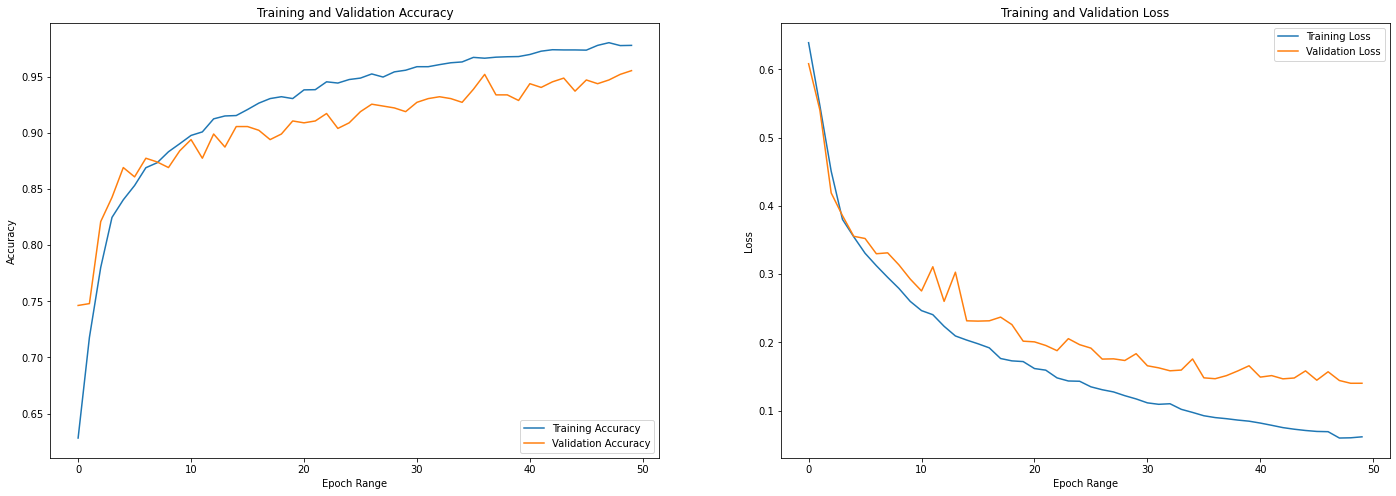

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch Range')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch Range')
plt.ylabel('Loss')
plt.show()

#-=-=-==-=-=-=-=-==-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-

#Using Tranfer Learning (mobilenet_v2 Model) 

In [20]:
import tensorflow_hub as hub

In [21]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224

feature_extractor = hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))

# Freeze the variables in the feature extractor layer, so that the training only modifies the final classifier layer.
feature_extractor.trainable = False

# Mobilenet model takes input of images of height and width of 224 pixels, and 3 color dimention. So we have to reconfigure our data splits appropriately to be able to continue training our model.

In [22]:
training_data = tf.keras.preprocessing.image_dataset_from_directory('Qatari-Dataset-Images-[3016Train-600Test]/training',
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    #class_names=[0,1],
                                                                    color_mode='rgb',
                                                                    batch_size=batch_size,
                                                                    image_size=(IMAGE_RES, IMAGE_RES),
                                                                    shuffle=True,
                                                                    seed=123,
                                                                    validation_split=0.1,
                                                                    subset='training')

print('----------------------------------')

validation_data = tf.keras.preprocessing.image_dataset_from_directory('Qatari-Dataset-Images-[3016Train-600Test]/training',
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    #class_names=[0,1],
                                                                    color_mode='rgb',
                                                                    batch_size=batch_size,
                                                                    image_size=(IMAGE_RES, IMAGE_RES),
                                                                    shuffle=True,
                                                                    seed=123,
                                                                    validation_split=0.1,
                                                                    subset='validation')

print('----------------------------------')

testing_data = tf.keras.preprocessing.image_dataset_from_directory('Qatari-Dataset-Images-[3016Train-600Test]/testing',
                                                                    labels='inferred',
                                                                    label_mode='int',
                                                                    #class_names=[0,1],
                                                                    color_mode='rgb',
                                                                    batch_size=batch_size,
                                                                    image_size=(IMAGE_RES, IMAGE_RES),
                                                                    shuffle=True,
                                                                    seed=123,
                                                                    #validation_split=0.1,
                                                                    )

Found 6032 files belonging to 2 classes.
Using 5429 files for training.
----------------------------------
Found 6032 files belonging to 2 classes.
Using 603 files for validation.
----------------------------------
Found 1200 files belonging to 2 classes.


# Prepare the data for training

In [23]:
# The map function applies the normalize function to each element in the train
# and test datasets

training_data = training_data.map(normalize)
validation_data = validation_data.map(normalize)
testing_data = testing_data.map(normalize)

#print(training_data.get_single_element())

In [24]:
# Wrap the hub layer in a 'tf.keras.Sequential' model, and add a new classification layer.

tl_model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(2)
])

tl_model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense_2 (Dense)             (None, 2)                 2004      
                                                                 
Total params: 3,542,269
Trainable params: 2,004
Non-trainable params: 3,540,265
_________________________________________________________________


# Compile the model and examine the layers

In [25]:
tl_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.00002), #0.00002 #0.0001
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

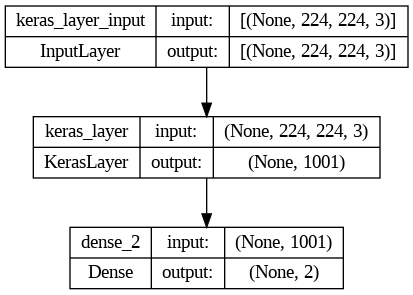

In [26]:
from keras.utils import plot_model
plot_model(tl_model, show_shapes = True, to_file = 'model.png')

# Train the model

In [27]:
epochs = 100 #50
tl_model_history = tl_model.fit(training_data, validation_data=validation_data, epochs=epochs)

Epoch 1/100
340/340 [==============================] - 22s 49ms/step - loss: 1.3334 - accuracy: 0.5509 - val_loss: 0.7156 - val_accuracy: 0.6352
Epoch 2/100
340/340 [==============================] - 18s 53ms/step - loss: 0.6462 - accuracy: 0.6821 - val_loss: 0.6004 - val_accuracy: 0.7148
Epoch 3/100
340/340 [==============================] - 16s 47ms/step - loss: 0.5603 - accuracy: 0.7331 - val_loss: 0.5380 - val_accuracy: 0.7380
Epoch 4/100
340/340 [==============================] - 15s 44ms/step - loss: 0.5059 - accuracy: 0.7618 - val_loss: 0.4935 - val_accuracy: 0.7579
Epoch 5/100
340/340 [==============================] - 16s 48ms/step - loss: 0.4658 - accuracy: 0.7854 - val_loss: 0.4589 - val_accuracy: 0.7695
Epoch 6/100
340/340 [==============================] - 15s 44ms/step - loss: 0.4338 - accuracy: 0.8005 - val_loss: 0.4295 - val_accuracy: 0.7894
Epoch 7/100
340/340 [==============================] - 16s 45ms/step - loss: 0.4071 - accuracy: 0.8158 - val_loss: 0.4049 - val_ac

# Evaluate the model on the test data

In [28]:
tl_model_loss_accuracy, tl_model_test_accuracy = tl_model.evaluate(testing_data)
print('Accuracy on test dataset:', tl_model_test_accuracy)

75/75 [==============================] - 3s 34ms/step - loss: 0.1472 - accuracy: 0.9400
Accuracy on test dataset: 0.9399999976158142


# Make predictions on the test data

In [29]:
tl_model_predictions = tl_model.predict(testing_data)
print(np.argmax(tl_model_predictions, axis=1)[:10])

75/75 [==============================] - 3s 33ms/step
[0 1 0 1 1 1 0 1 1 0]


In [30]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1./255)
generator = image_gen.flow_from_directory(batch_size=30,
                                          directory='Qatari-Dataset-Images-[3016Train-600Test]/testing', 
                                          shuffle=True,
                                          color_mode='rgb',
                                          target_size=(224,224),
                                          seed=123
                                          )

Found 1200 images belonging to 2 classes.


In [31]:
# Prediction vs actual, for 16 (batch size) sampled images.

X,y = generator.next()
tl_model_prediction = tl_model.predict(X)
print('Predicted: ', np.argmax(tl_model_prediction, axis=1))
print('Actual:    ', np.argmax(y, axis=1))
print()

1/1 [==============================] - 1s 1s/step
Predicted:  [0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1]
Actual:     [0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1]



# Visualize the model's **accuracy** and **loss** during training

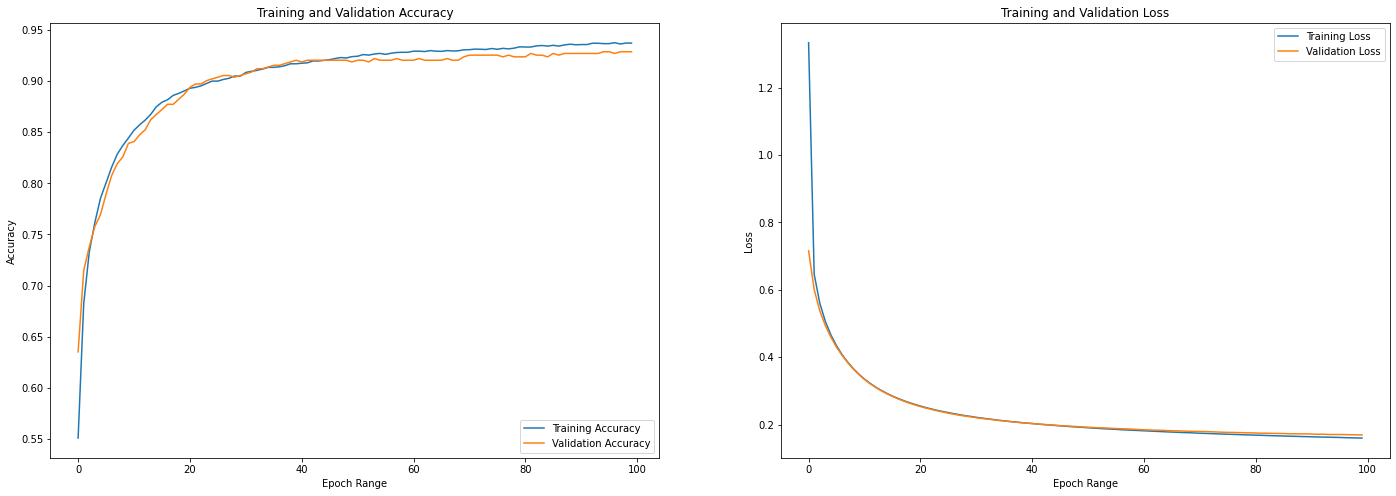

In [32]:
tl_model_acc = tl_model_history.history['accuracy']
tl_model_val_acc = tl_model_history.history['val_accuracy']

tl_model_loss = tl_model_history.history['loss']
tl_model_val_loss = tl_model_history.history['val_loss']

tl_model_epochs_range = range(epochs)

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(tl_model_epochs_range, tl_model_acc, label='Training Accuracy')
plt.plot(tl_model_epochs_range, tl_model_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch Range')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(tl_model_epochs_range, tl_model_loss, label='Training Loss')
plt.plot(tl_model_epochs_range, tl_model_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch Range')
plt.ylabel('Loss')
plt.show()

# Self made model vs Transfer learning model using Mobilenet_v2 (Performance Summary)

#1. Accuracy

In [33]:
print('[Self Made Model] Accuracy on test dataset:       ', test_accuracy)
print('[Tranfer Learning Model] Accuracy on test dataset:', tl_model_test_accuracy)

[Self Made Model] Accuracy on test dataset:        0.9558333158493042
[Tranfer Learning Model] Accuracy on test dataset: 0.9399999976158142


#2. Predictions

In [34]:
print('Self Made Model:-')
print('- Predicted: ', np.argmax(prediction, axis=1))
print('- Actual:    ', np.argmax(y, axis=1))

print()

print('Transfer Learning Model:-')
print('- Predicted: ', np.argmax(tl_model_prediction, axis=1))
print('- Actual:    ', np.argmax(y, axis=1))

Self Made Model:-
- Predicted:  [0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1]
- Actual:     [0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1]

Transfer Learning Model:-
- Predicted:  [0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1]
- Actual:     [0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1]


#3. Accuracy and loss graphs for both models side by side

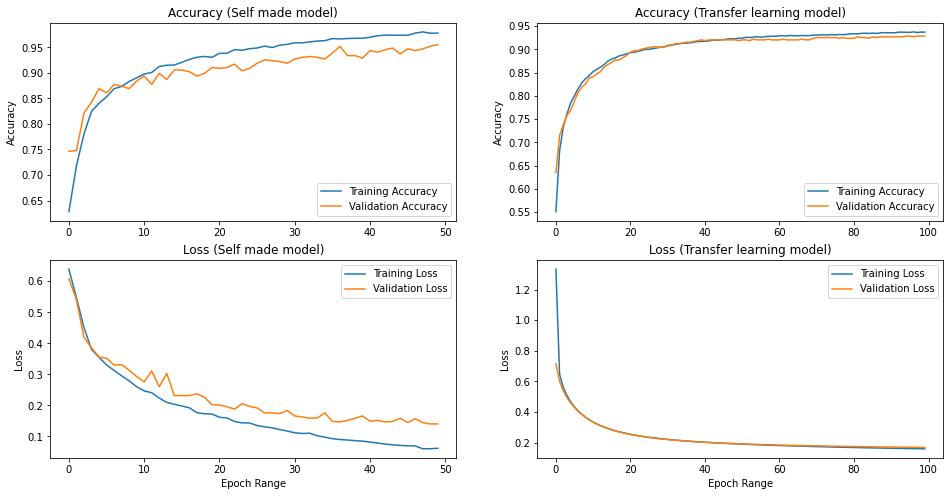

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Self made model (Accuracy).
axs[0, 0].plot(epochs_range, acc, label='Training Accuracy')
axs[0, 0].plot(epochs_range, val_acc, label='Validation Accuracy')
axs[0, 0].legend(loc='lower right')
axs[0, 0].set(ylabel='Accuracy', title='Accuracy (Self made model)')

# Tranfer learning model (Accuracy).
axs[0, 1].plot(tl_model_epochs_range, tl_model_acc, label='Training Accuracy')
axs[0, 1].plot(tl_model_epochs_range, tl_model_val_acc, label='Validation Accuracy')
axs[0, 1].legend(loc='lower right')
axs[0, 1].set(ylabel='Accuracy', title='Accuracy (Transfer learning model)')

# Self made model (Loss).
axs[1, 0].plot(epochs_range, loss, label='Training Loss')
axs[1, 0].plot(epochs_range, val_loss, label='Validation Loss')
axs[1, 0].legend(loc='upper right')
axs[1, 0].set(xlabel='Epoch Range', ylabel='Loss', title='Loss (Self made model)')

# Transfer learning (Loss).
axs[1, 1].plot(tl_model_epochs_range, tl_model_loss, label='Training Loss')
axs[1, 1].plot(tl_model_epochs_range, tl_model_val_loss, label='Validation Loss')
axs[1, 1].legend(loc='upper right')
axs[1, 1].set(xlabel='Epoch Range', ylabel='Loss', title='Loss (Transfer learning model)')

plt.show()